In [1]:
from five_one_one import is_python_version
assert is_python_version(3, 9, 6)

In [2]:
from math import sqrt
from time import time

In [3]:
def test_fib(f):
    assert f(1) == 1
    assert f(2) == 1
    assert f(3) == 2
    assert f(4) == 3
    assert f(5) == 5
    assert f(6) == 8
    assert f(7) == 13
    assert f(8) == 21

In [4]:
def fib0(x):
    """
        Recursive implementation with no `if`s and no `assert`s
    """
    try:
        # raises ValueError if x is negative
        _ = sqrt(x)
        # raises ZeroDivisionError if x is 0
        _ = 1 / x
        # raises ZeroDivisionError if x is 1
        _ = 1 / (x - 1)
        # raises ZeroDivisionError if x is 2
        _ = 1 / (x - 2)
    except (ZeroDivisionError, ValueError):
        # if x <= 2, return 1
        return 1
    
    return fib0(x-1) + fib0(x-2)

test_fib(fib0)

In [5]:
def fib1(x):
    """
        Classic recursive solution
    """
    if x <= 2:
        return 1
    return fib1(x-1) + fib1(x-2)

test_fib(fib1)

In [6]:
def fib2(x):
    """
        Classic iterative approach
    """
    if x <= 2:
        return 1
    seq = [1, 1]
    while len(seq) < x:
        seq.append(seq[-1] + seq[-2])
    return seq[x-1]

test_fib(fib2)

In [7]:
def fib3(x):
    """
        Recursive solution with memoization
    """
    
    if x <= 2:
        return 1
    
    memo = {1: 1, 2: 1}
    def fib3_inner(_x):
        if _x not in memo:
            memo[_x] = fib3_inner(_x-1) + fib3_inner(_x-2)
        return memo[_x]
    
    return fib3_inner(x)

test_fib(fib3)

In [8]:
def fib4(x):
    """
        Alternate iterative approach
    """
    if x <= 2:
        return 1
    seq = [1]*x
    for i in range(2, x):
        seq[i] = seq[i-1] + seq[i-2]
    return seq[-1]

test_fib(fib4)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import timeit

In [10]:
# arguments to fib
xs = np.array(range(5, 26, 5))

In [11]:
# this block will probably take a while to run

ys = np.array([
    [
        timeit(f"fib({x})", setup=f"from __main__ import fib{n} as fib", number=10)
        for x in xs
    ]
    for n in range(5)
])


In [12]:
def plot(fibs_to_use=[0, 1, 2, 3, 4,]):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

    ax.set_xlabel("Arg to fib")
    ax.set_xticklabels(str(x) for x in xs)
    ax.set_xticks(xs)

    ax.set_ylabel("Runtime (seconds)")

    bars = [ax.bar(xs+ix, ys[ix]) for ix in fibs_to_use]

    legend = ["try/except", "naive recursive", "iterative 1", "memoized recursive", "iterative 2"]
    ax.legend(bars, [legend[ix] for ix in fibs_to_use])

    fig.show()

/tmp/ipykernel_2858670/4046738398.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(str(x) for x in xs)
/tmp/ipykernel_2858670/4046738398.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


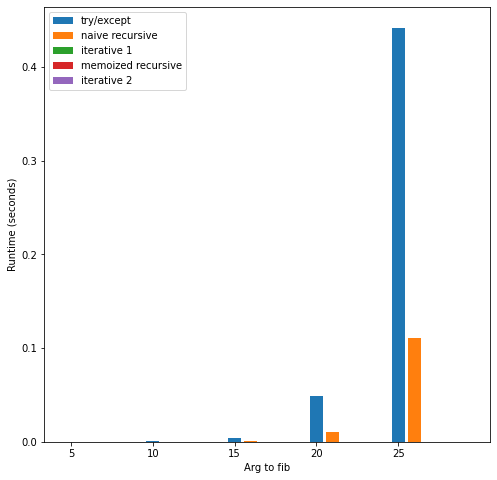

In [13]:
plot()

/tmp/ipykernel_2858670/4046738398.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(str(x) for x in xs)
/tmp/ipykernel_2858670/4046738398.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


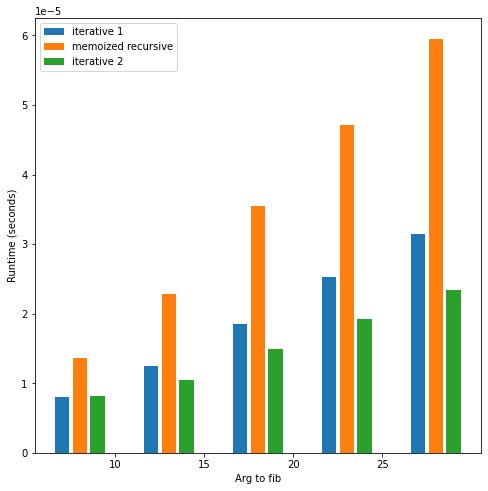

In [14]:
plot(fibs_to_use=[2, 3, 4,])